# Загрузка данных

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [1]:
import pandas as pd

df = pd.read_csv('/content/amazon_market_data14.csv')
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение столбцов к стилю camel_case

In [2]:
import re

def to_camel_case(column_name):
    # Разделяем слова по пробелам, подчеркиваниям и дефисам
    words = re.split(r'[_\s-]+', column_name)
    # Первое слово с маленькой буквы, остальные с заглавной
    if len(words) == 0:
        return column_name
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Приводим все столбцы к camelCase
df.columns = [to_camel_case(col) for col in df.columns]
print(df.columns)

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'subCategory', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


In [3]:
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,region,productId,category,subCategory,productName,sales,quantity,discount,profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение типов данных

In [4]:
#привести дату к типу datetime

df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y', errors='coerce')
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,region,productId,category,subCategory,productName,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Поиск дублей и пропусков в данных

In [5]:
df_clean = df.drop_duplicates()
# Удаление строк с любыми пропущенными значениями
df_clean = df_clean.dropna()
print(f"Было строк: {len(df)}")
print(f"Осталось строк: {len(df_clean)}")
print(f"Удалено записей: {len(df) - len(df_clean)}")
df = df_clean

Было строк: 3312
Осталось строк: 3312
Удалено записей: 0


# Исследовательский анализ данных

In [6]:
# сколько уникальных заказов?

# Подсчет уникальных заказов
unique_orders_count = df['orderId'].nunique()
print(f"Количество уникальных заказов: {unique_orders_count}")

Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?

# Подсчет уникальных клиентов
unique_customers_count = df['customerId'].nunique()
print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 693


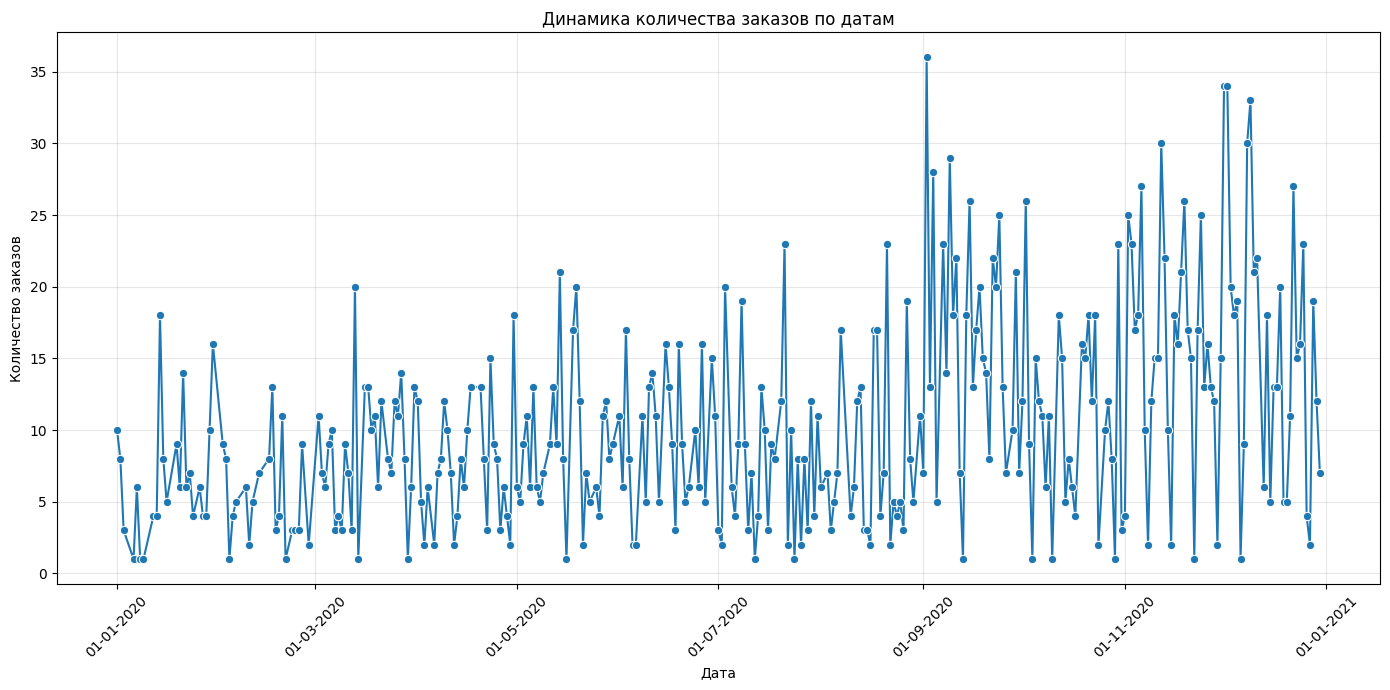

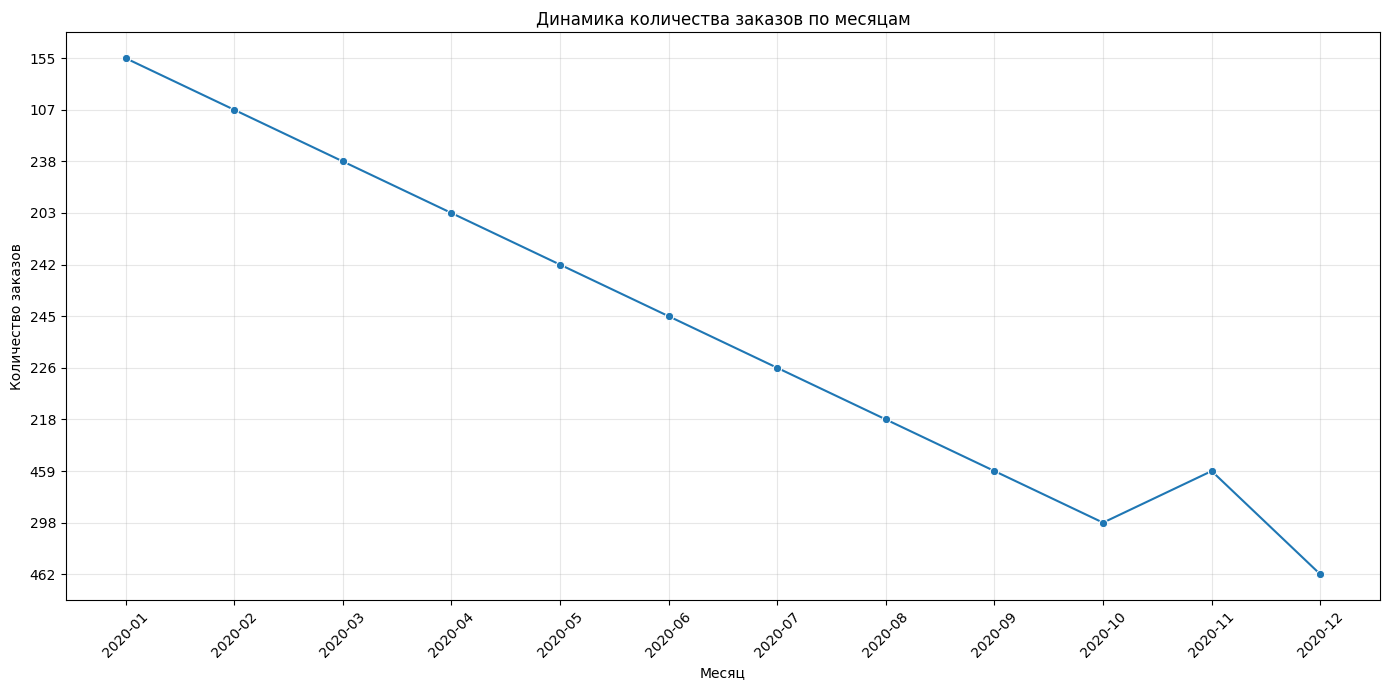

In [ ]:
# изучть динамику кол-ва заказов по дате заказов

import matplotlib.pyplot as plt

# 1. Группируем данные по дате и считаем количество заказов
orders_by_date = df.groupby('orderDate').size().reset_index(name='order_count')

# 2. Визуализируем динамику заказов по дням
plt.figure(figsize=(14, 7))
sns.lineplot(data=orders_by_date, x='orderDate', y='order_count', marker='o')
plt.title('Динамика количества заказов по датам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True, alpha=0.3)
# Форматируем оси
date_form = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Анализируем динамику по месяцам
df['orderMonth'] = df['orderDate'].dt.to_period('M')
orders_by_month = df.groupby('orderMonth').size().reset_index(name='order_count').astype(str)
df
plt.figure(figsize=(14, 7))
sns.lineplot(data=orders_by_month, x='orderMonth', y='order_count', marker='o')
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

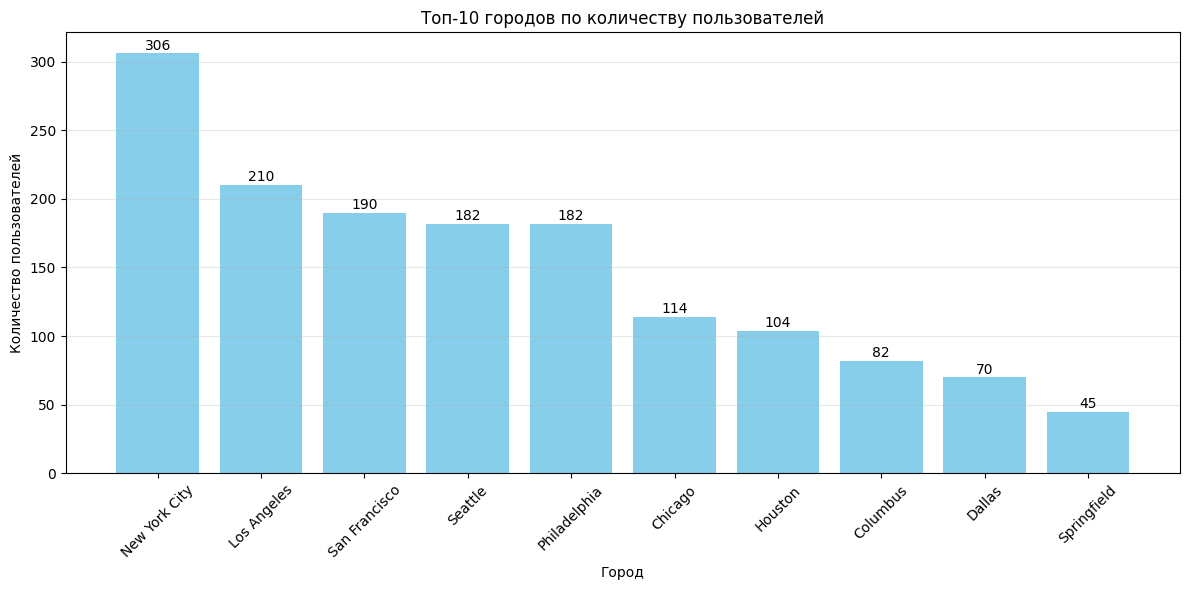

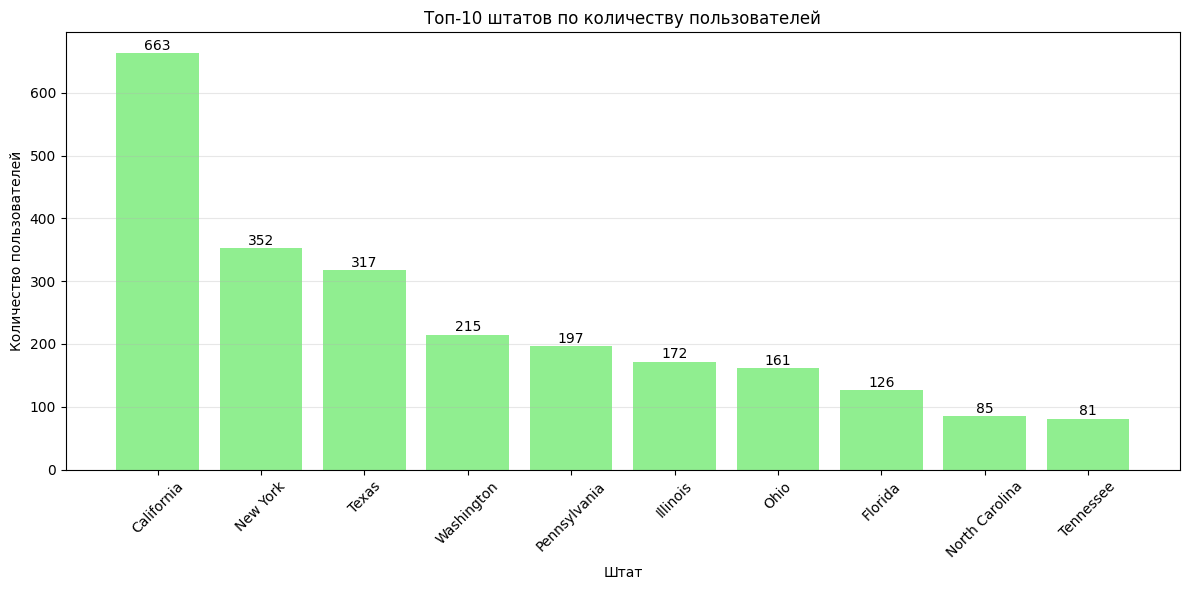

In [ ]:
# изучить локацию пользователей (визуализировать)

#import matplotlib.pyplot as plt
#import numpy as np

# 1. Группируем данные по городам и суммируем количество пользователей
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# 2. Группируем данные по штатам и суммируем количество пользователей
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

# 3. Строим график распределения пользователей по городам (топ-10)
plt.figure(figsize=(12, 6))
top_cities = city_counts.head(10)
plt.bar(top_cities['city'], top_cities['count'], color='skyblue')
plt.title('Топ-10 городов по количеству пользователей')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(top_cities['count']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Строим график распределения пользователей по штатам
plt.figure(figsize=(12, 6))
top_state = state_counts.head(10)
plt.bar(top_state['state'], top_state['count'], color='lightgreen')
plt.title('Топ-10 штатов по количеству пользователей')
plt.xlabel('Штат')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(top_state['count']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

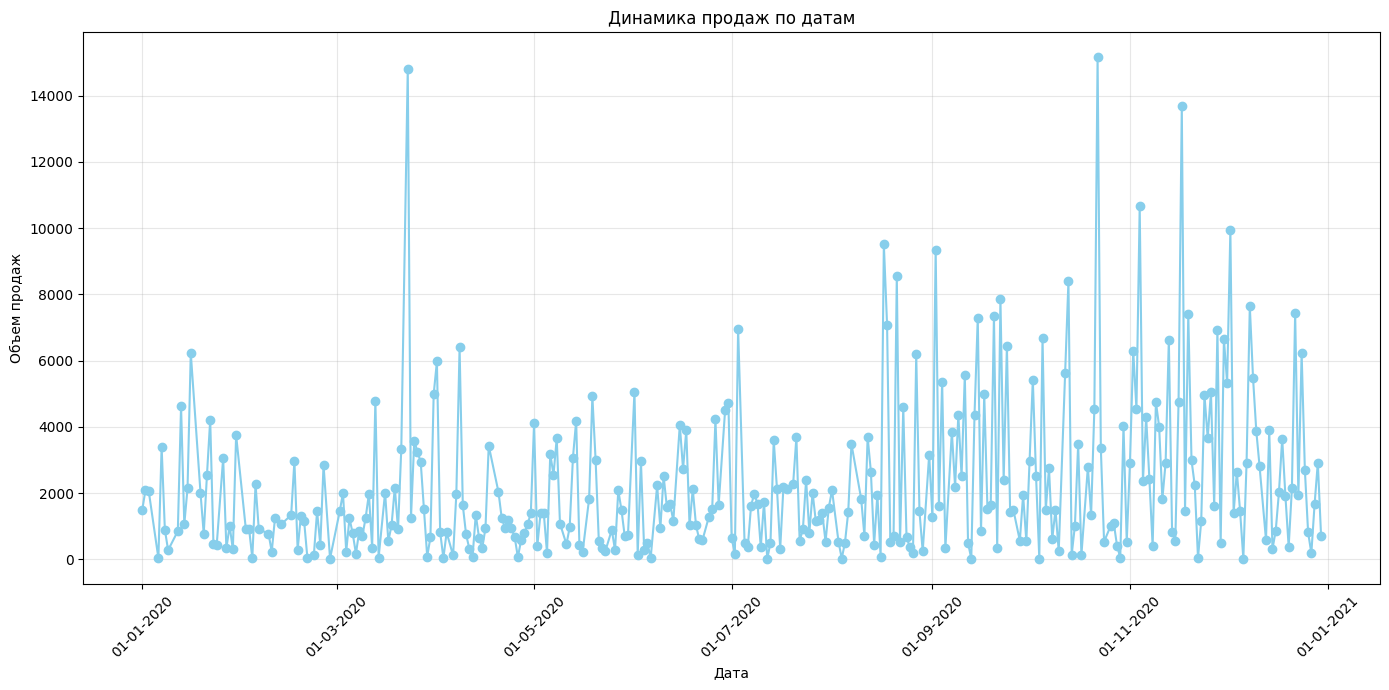

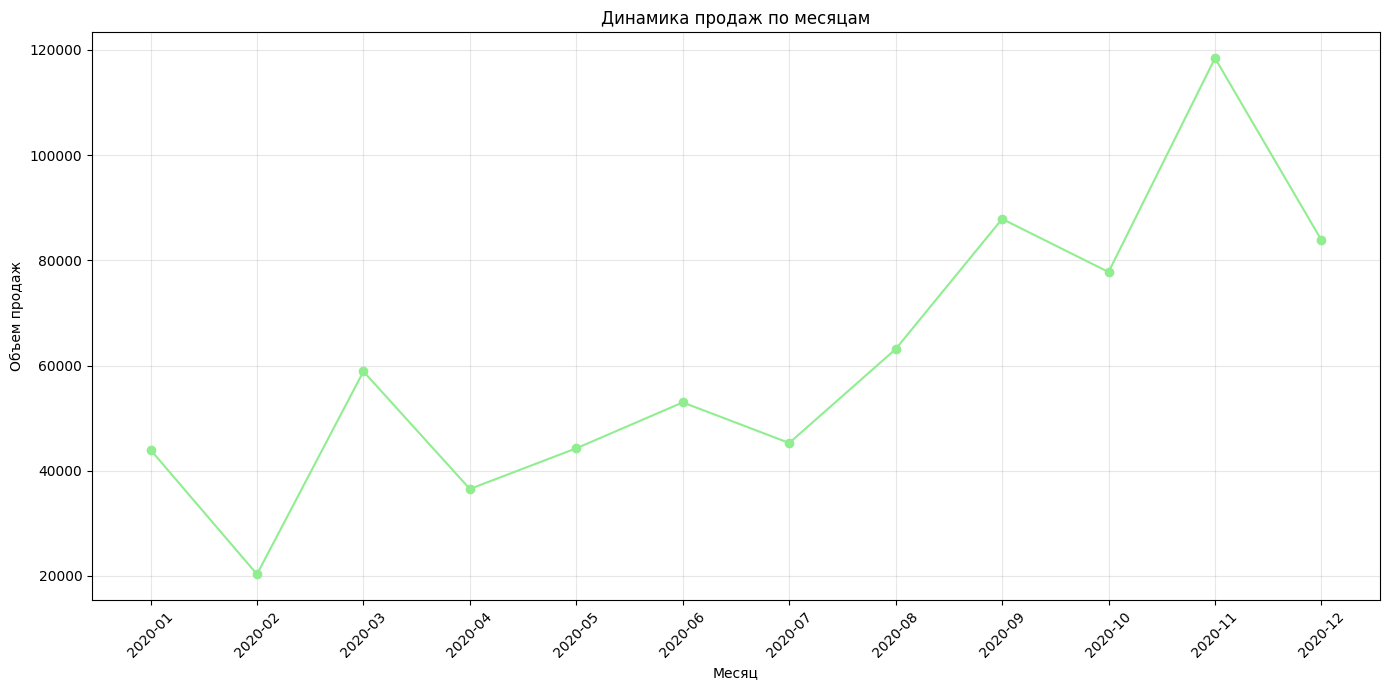

In [ ]:
# изучть динамику продаж по дате заказов

from matplotlib.dates import DateFormatter
# 1. Преобразуем столбец orderDate в формат datetime
#df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%Y', errors='coerce')

# 2. Группируем данные по дате и суммируем продажи
sales_by_date = df.groupby('orderDate')['sales'].sum().reset_index(name='total_sales')

# 3. Строим график динамики продаж по датам
plt.figure(figsize=(14, 7))
plt.plot(sales_by_date['orderDate'], sales_by_date['total_sales'], marker='o', color='skyblue')
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.grid(True, alpha=0.3)

# Форматируем оси
date_form = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Строим график динамики продаж по месяцам
df['orderMonth'] = df['orderDate'].dt.to_period('M')
sales_by_month = df.groupby('orderMonth')['sales'].sum().reset_index(name='total_sales')
plt.figure(figsize=(14, 7))
plt.plot(sales_by_month['orderMonth'].astype(str), sales_by_month['total_sales'], marker='o', color='lightgreen')
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

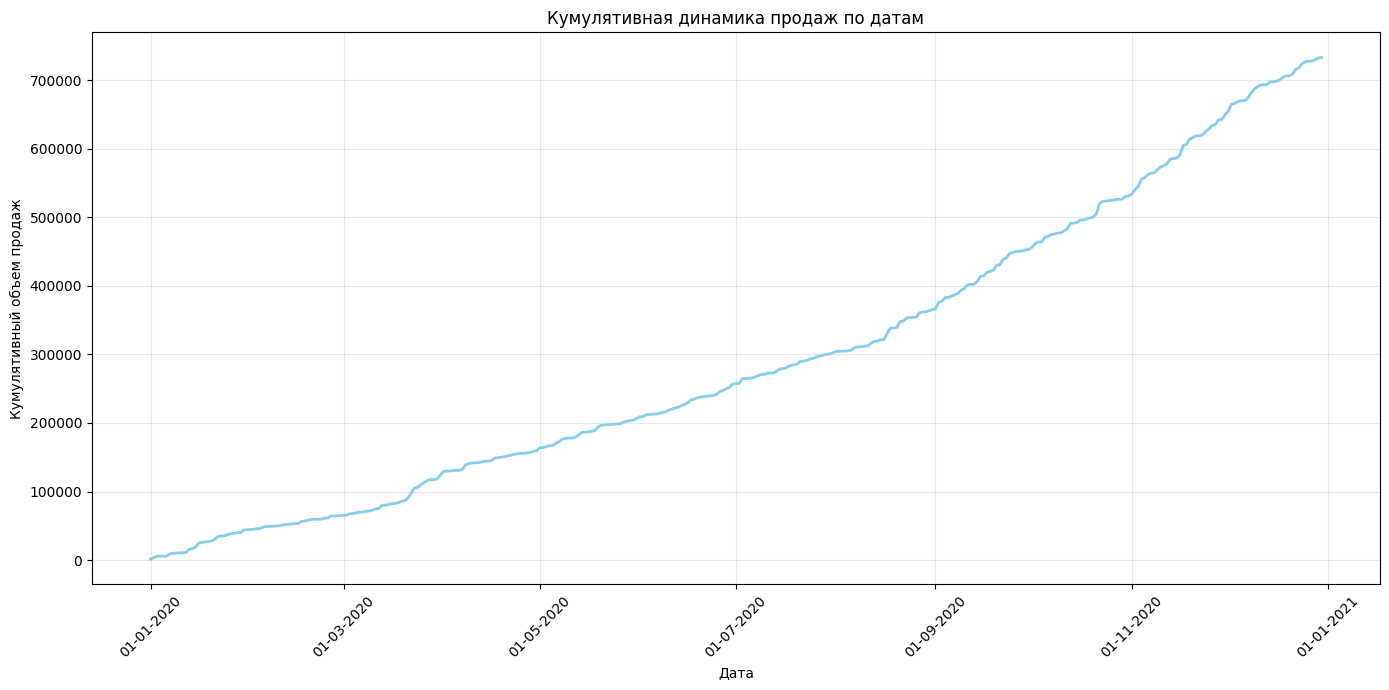

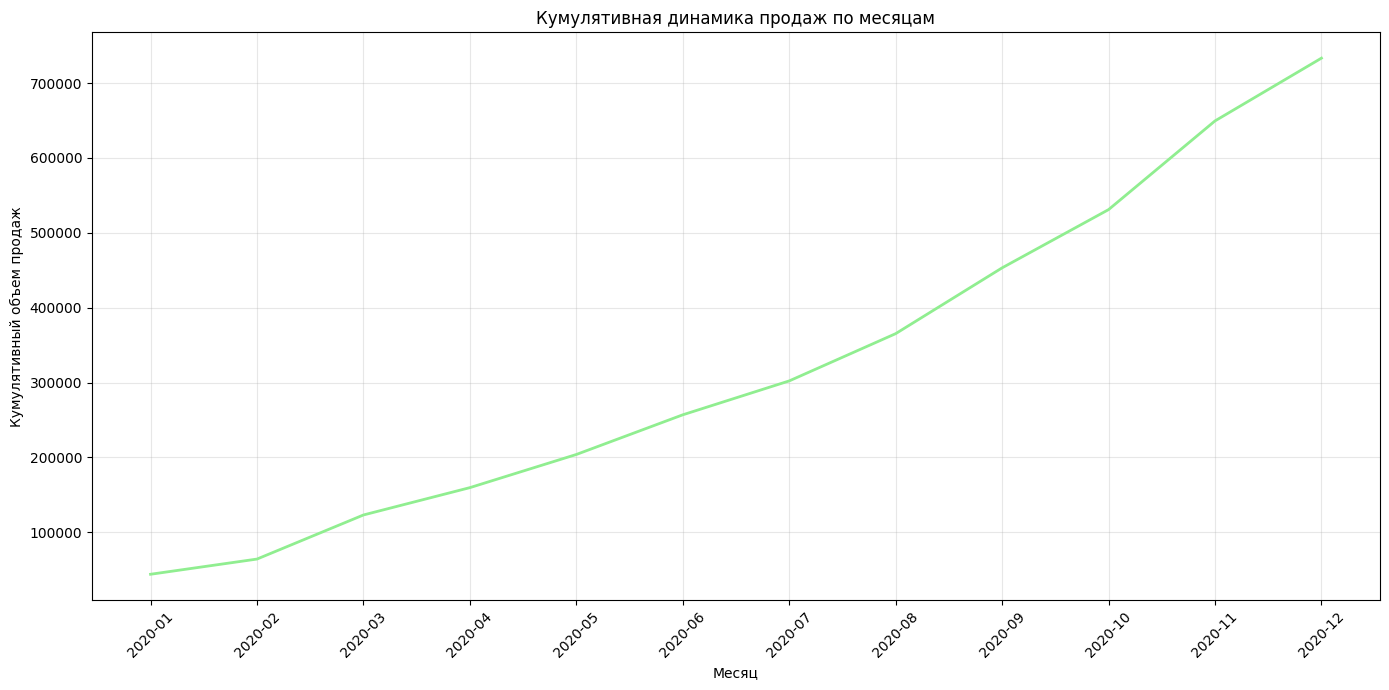

In [ ]:
# 4. Рассчитываем кумулятивные продажи
sales_by_date['cumulative_sales'] = sales_by_date['total_sales'].cumsum()

# 5. Строим кумулятивный график динамики продаж
plt.figure(figsize=(14, 7))
plt.plot(sales_by_date['orderDate'], sales_by_date['cumulative_sales'], color='skyblue', linewidth=2)
plt.title('Кумулятивная динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный объем продаж')
plt.grid(True, alpha=0.3)

# Форматируем оси
date_form = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Строим кумулятивный график динамики продаж по месяцам
df['orderMonth'] = df['orderDate'].dt.to_period('M')
sales_by_month = df.groupby('orderMonth')['sales'].sum().reset_index(name='total_sales')
sales_by_month['cumulative_sales'] = sales_by_month['total_sales'].cumsum()
plt.figure(figsize=(14, 7))
plt.plot(sales_by_month['orderMonth'].astype(str), sales_by_month['cumulative_sales'], color='lightgreen', linewidth=2)
plt.title('Кумулятивная динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кумулятивный объем продаж')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

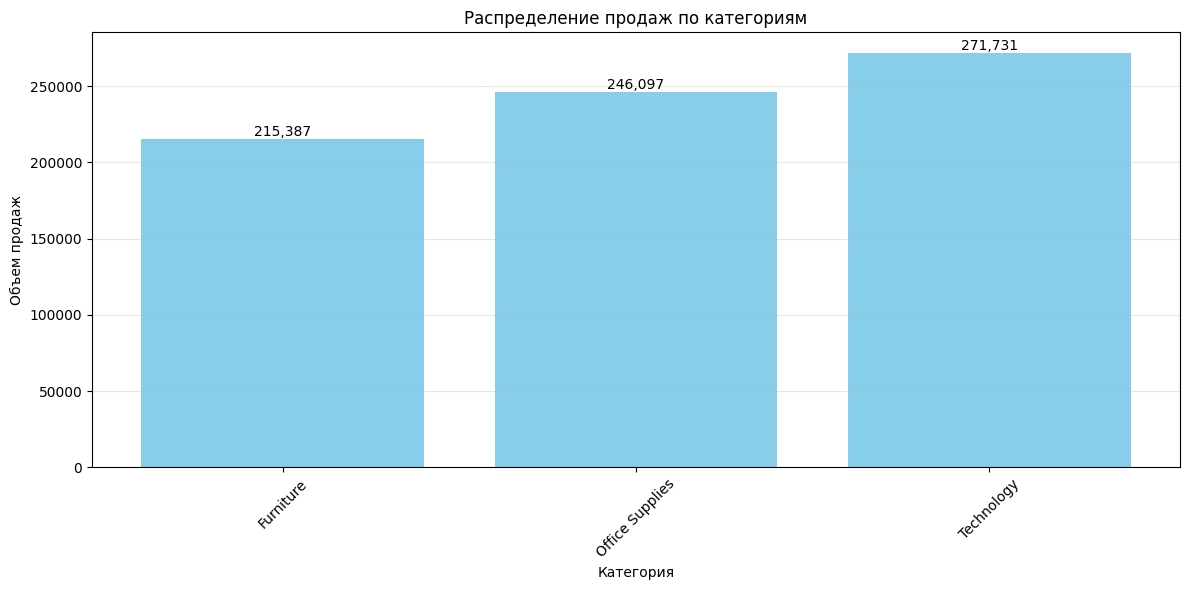

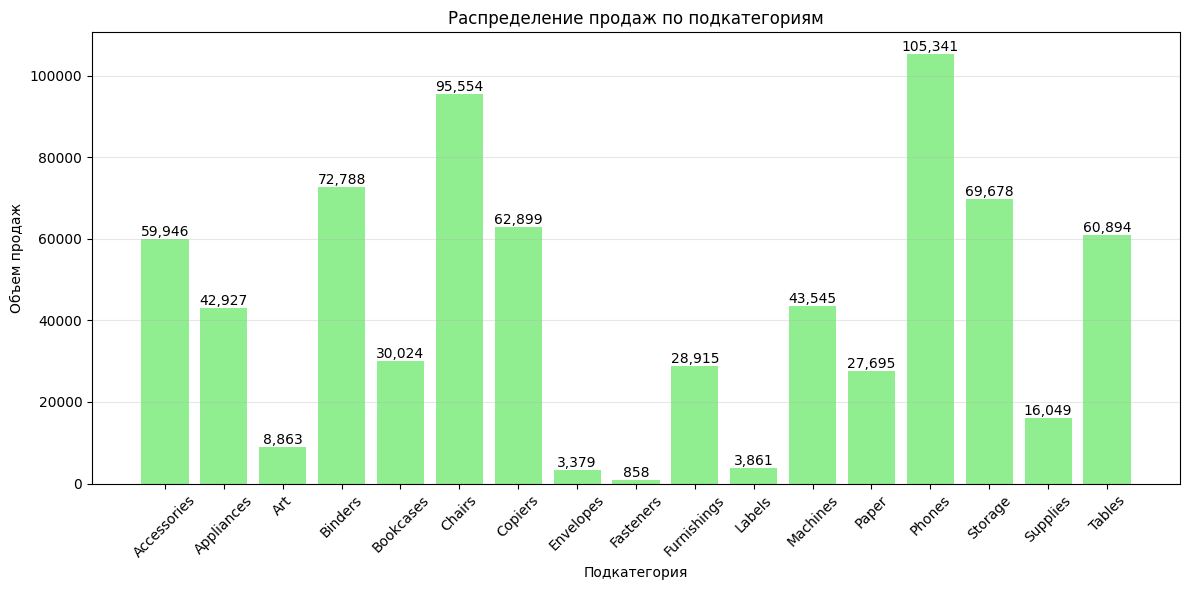

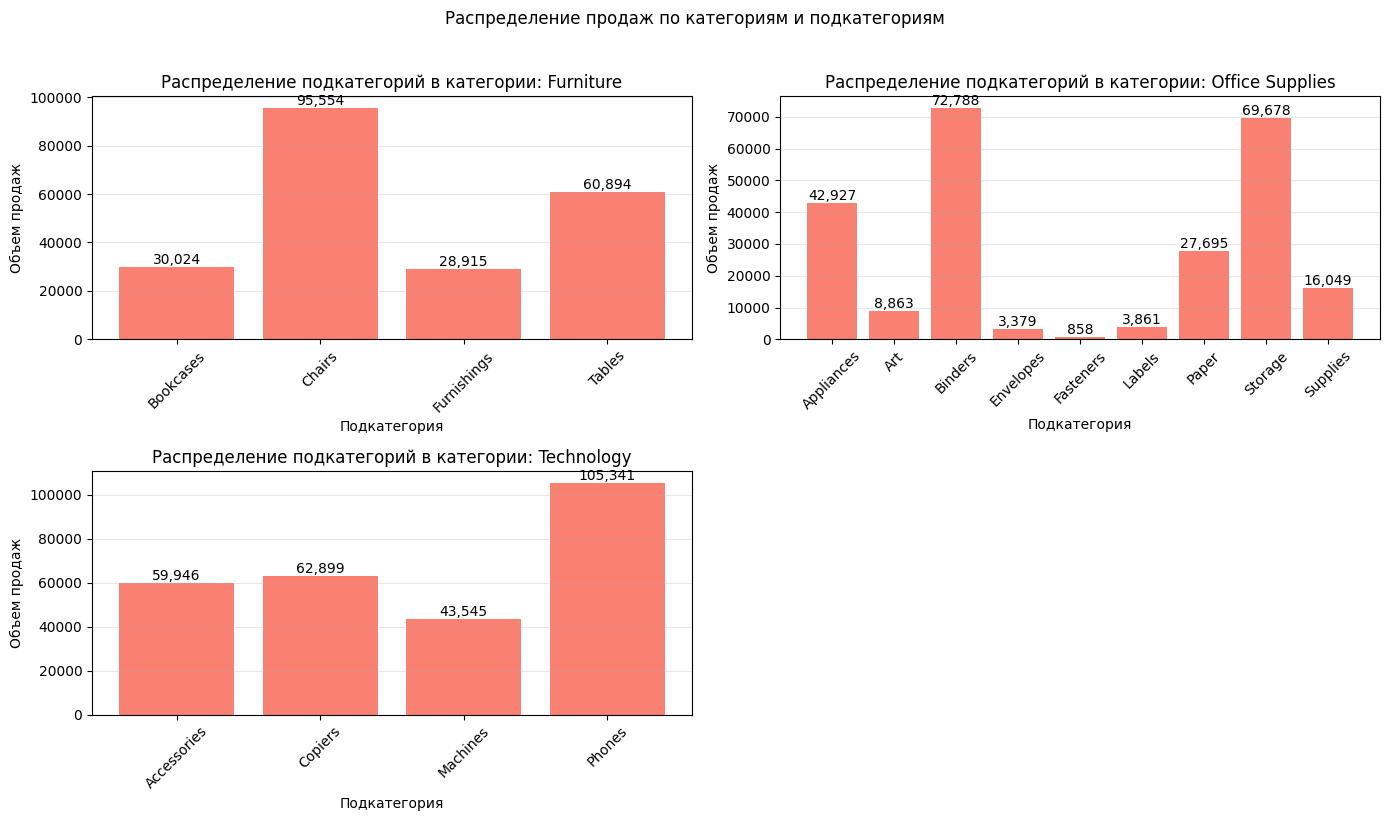

In [ ]:
# изучть распределение продаж по категориям заказов

# 1. Группируем данные по категориям и суммируем продажи
sales_by_category = df.groupby('category')['sales'].sum().reset_index(name='total_sales')

# 2. Группируем данные по подкатегориям и суммируем продажи
sales_by_subcategory = df.groupby('subCategory')['sales'].sum().reset_index(name='total_sales')

# 3. Группируем данные по категориям и подкатегориям и суммируем продажи
sales_by_category_subcategory = df.groupby(['category', 'subCategory'])['sales'].sum().reset_index(name='total_sales')

# 4. Строим график распределения продаж по категориям
plt.figure(figsize=(12, 6))
plt.bar(sales_by_category['category'], sales_by_category['total_sales'], color='skyblue')
plt.title('Распределение продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(sales_by_category['total_sales']):
    plt.text(i, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Строим график распределения продаж по подкатегориям
plt.figure(figsize=(12, 6))
plt.bar(sales_by_subcategory['subCategory'], sales_by_subcategory['total_sales'], color='lightgreen')
plt.title('Распределение продаж по подкатегориям')
plt.xlabel('Подкатегория')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(sales_by_subcategory['total_sales']):
    plt.text(i, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Строим график распределения продаж по категориям и подкатегориям
plt.figure(figsize=(14, 8))

# Получаем уникальные категории
categories = sales_by_category_subcategory['category'].unique()

# Строим графики для каждой категории
for i, category in enumerate(categories):
    category_data = sales_by_category_subcategory[sales_by_category_subcategory['category'] == category]
    plt.subplot(2, 2, i+1)
    plt.bar(category_data['subCategory'], category_data['total_sales'], color='salmon')
    plt.title(f'Распределение подкатегорий в категории: {category}')
    plt.xlabel('Подкатегория')
    plt.ylabel('Объем продаж')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Добавляем подписи к столбцам
    for j, v in enumerate(category_data['total_sales']):
        plt.text(j, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.suptitle('Распределение продаж по категориям и подкатегориям', y=1.02)
plt.tight_layout()
plt.show()

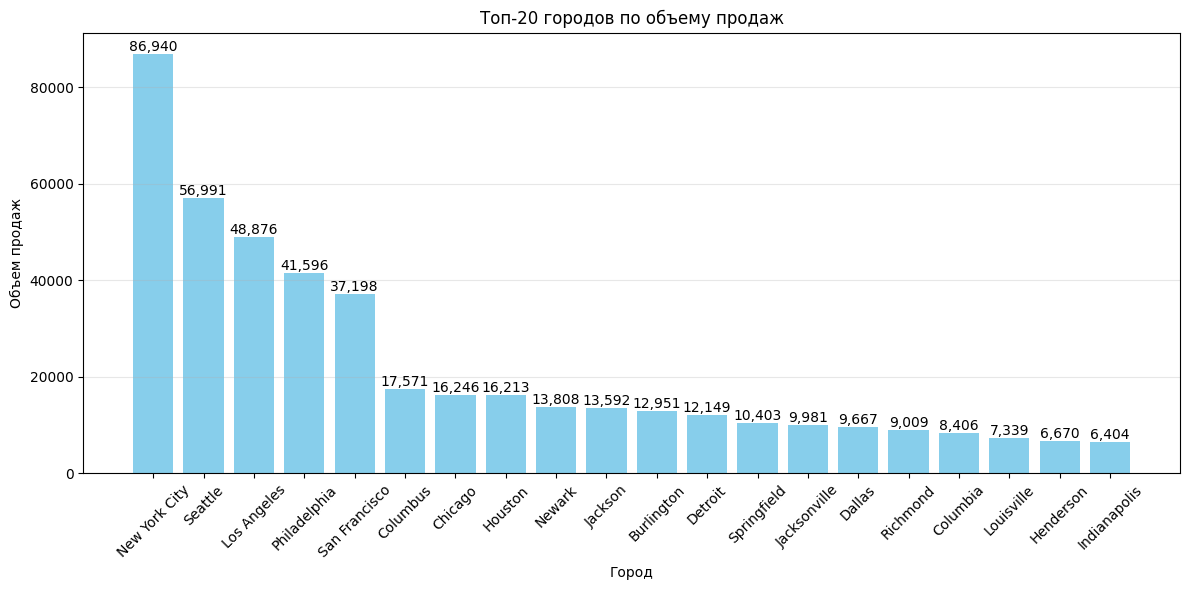

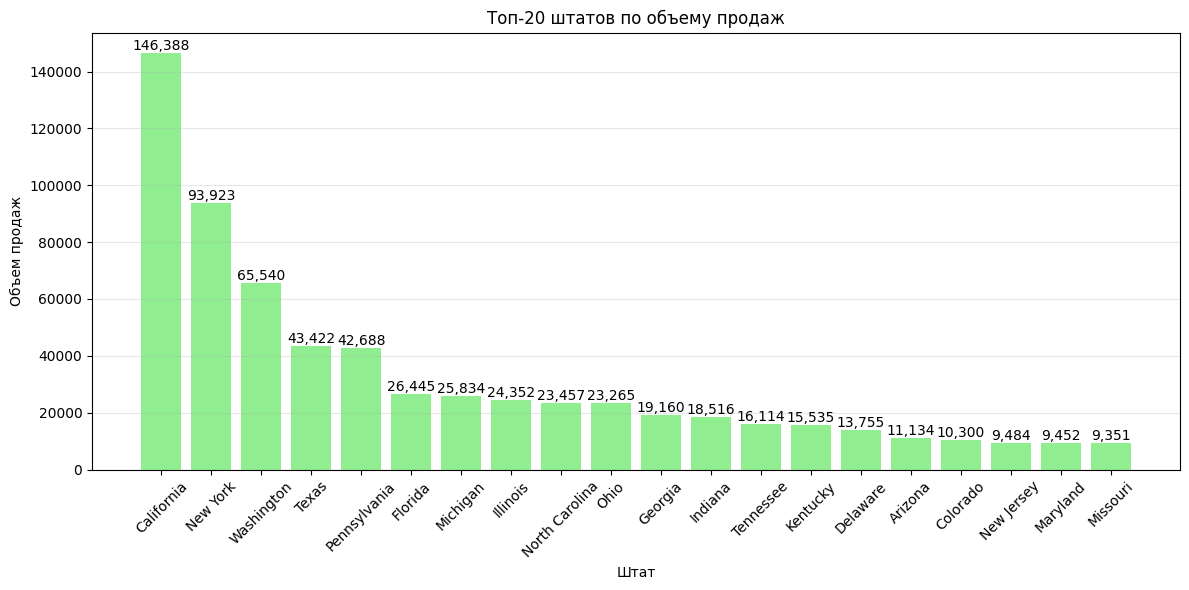

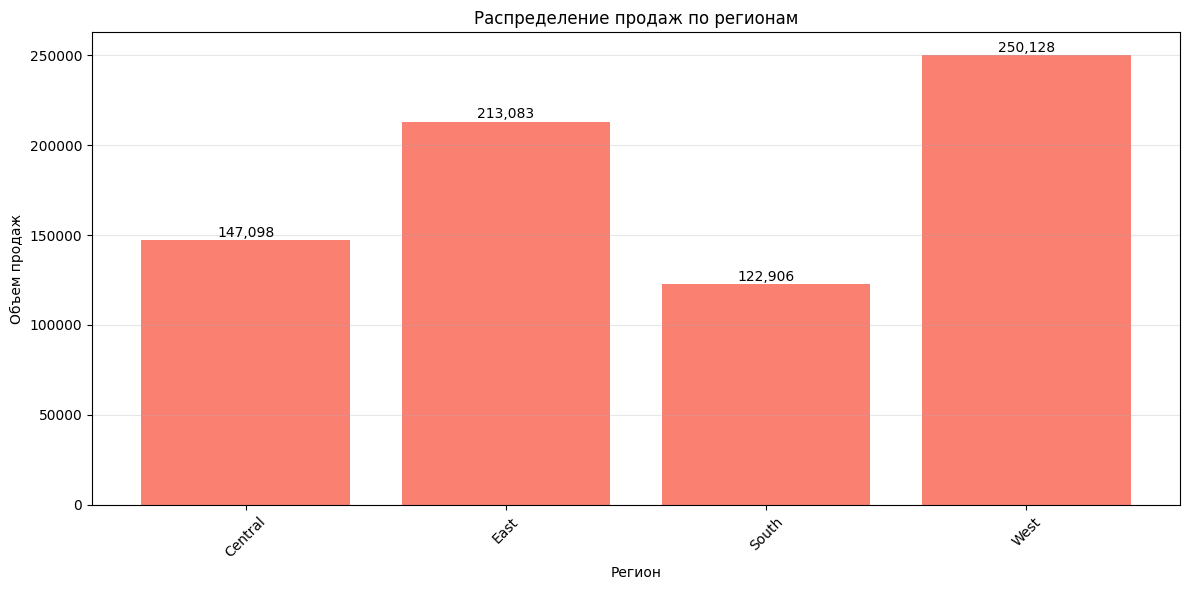

In [ ]:
# изучть распределение продаж по городам (штатам)

# 1. Группируем данные по городам и суммируем продажи
sales_by_city = df.groupby('city')['sales'].sum().reset_index(name='total_sales')

# 2. Группируем данные по штатам и суммируем продажи
sales_by_state = df.groupby('state')['sales'].sum().reset_index(name='total_sales')

# 3. Группируем данные по регионам и суммируем продажи
sales_by_region = df.groupby('region')['sales'].sum().reset_index(name='total_sales')


# 4. Строим график распределения продаж по городам (топ-10)
plt.figure(figsize=(12, 6))
top_cities = sales_by_city.sort_values('total_sales', ascending=False).head(20)
plt.bar(top_cities['city'], top_cities['total_sales'], color='skyblue')
plt.title('Топ-20 городов по объему продаж')
plt.xlabel('Город')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(top_cities['total_sales']):
    plt.text(i, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Строим график распределения продаж по штатам
plt.figure(figsize=(12, 6))
top_state = sales_by_state.sort_values('total_sales', ascending=False).head(20)
plt.bar(top_state['state'], top_state['total_sales'], color='lightgreen')
plt.title('Топ-20 штатов по объему продаж')
plt.xlabel('Штат')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(top_state['total_sales']):
    plt.text(i, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Строим график распределения продаж по регионам
plt.figure(figsize=(12, 6))
plt.bar(sales_by_region['region'], sales_by_region['total_sales'], color='salmon')
plt.title('Распределение продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(sales_by_region['total_sales']):
    plt.text(i, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

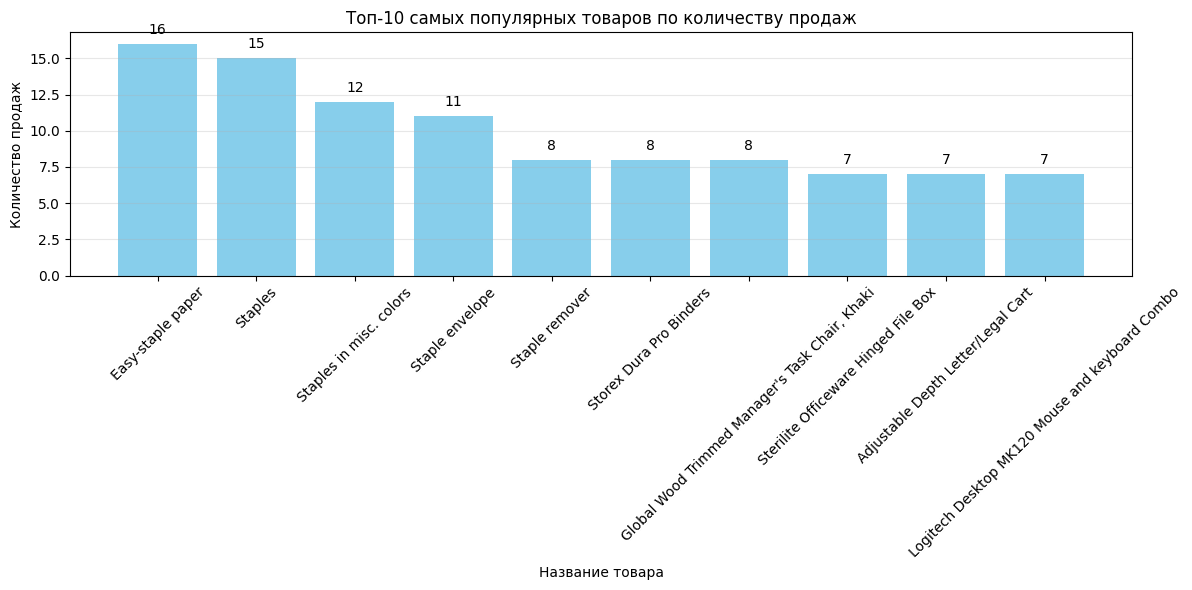

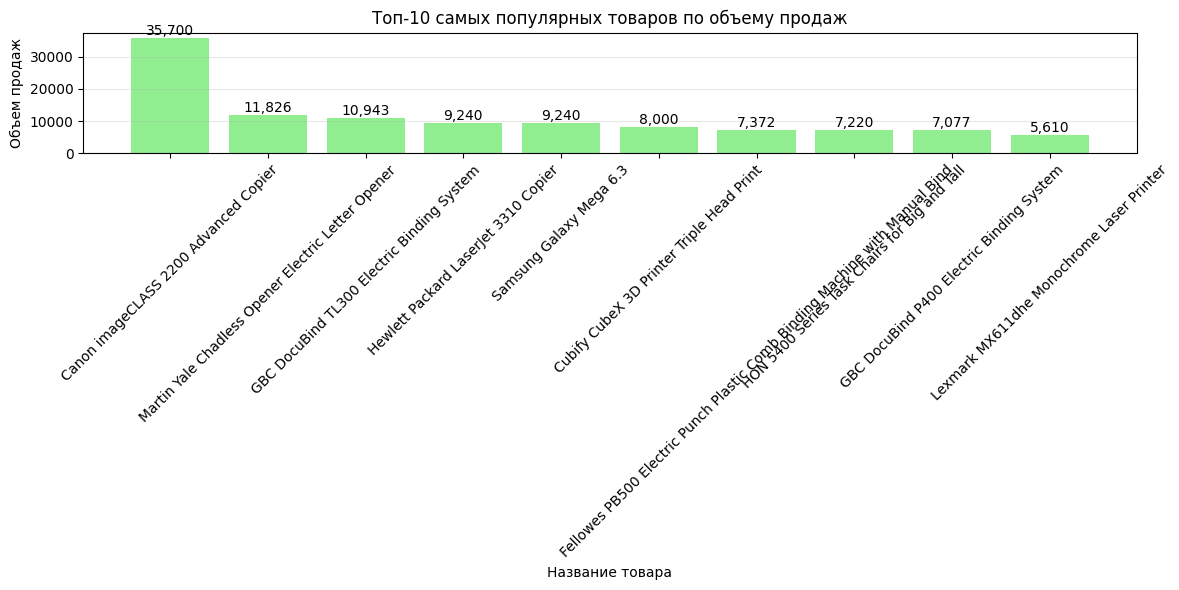

In [ ]:
# найти самые популярные товары (Product Name)

# 1. Группируем данные по названиям товаров и считаем количество продаж
product_counts = df.groupby('productName').size().reset_index(name='order_count')

# 2. Группируем данные по названиям товаров и суммируем объем продаж
product_sales = df.groupby('productName')['sales'].sum().reset_index(name='total_sales')

# 3. Объединяем данные о количестве продаж и объеме продаж
popular_products = pd.merge(product_counts, product_sales, on='productName')

# 4. Сортируем данные по убыванию количества продаж
popular_products = popular_products.sort_values('order_count', ascending=False)

# 5. Строим график топ-10 самых популярных товаров по количеству продаж
plt.figure(figsize=(12, 6))
top_products_count = popular_products.head(10)
plt.bar(top_products_count['productName'], top_products_count['order_count'], color='skyblue')
plt.title('Топ-10 самых популярных товаров по количеству продаж')
plt.xlabel('Название товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(top_products_count['order_count']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Строим график топ-10 самых популярных товаров по объему продаж
plt.figure(figsize=(12, 6))
top_products_sales = popular_products.sort_values('total_sales', ascending=False).head(10)
plt.bar(top_products_sales['productName'], top_products_sales['total_sales'], color='lightgreen')
plt.title('Топ-10 самых популярных товаров по объему продаж')
plt.xlabel('Название товара')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи к столбцам
for i, v in enumerate(top_products_sales['total_sales']):
    plt.text(i, v + 0.5, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

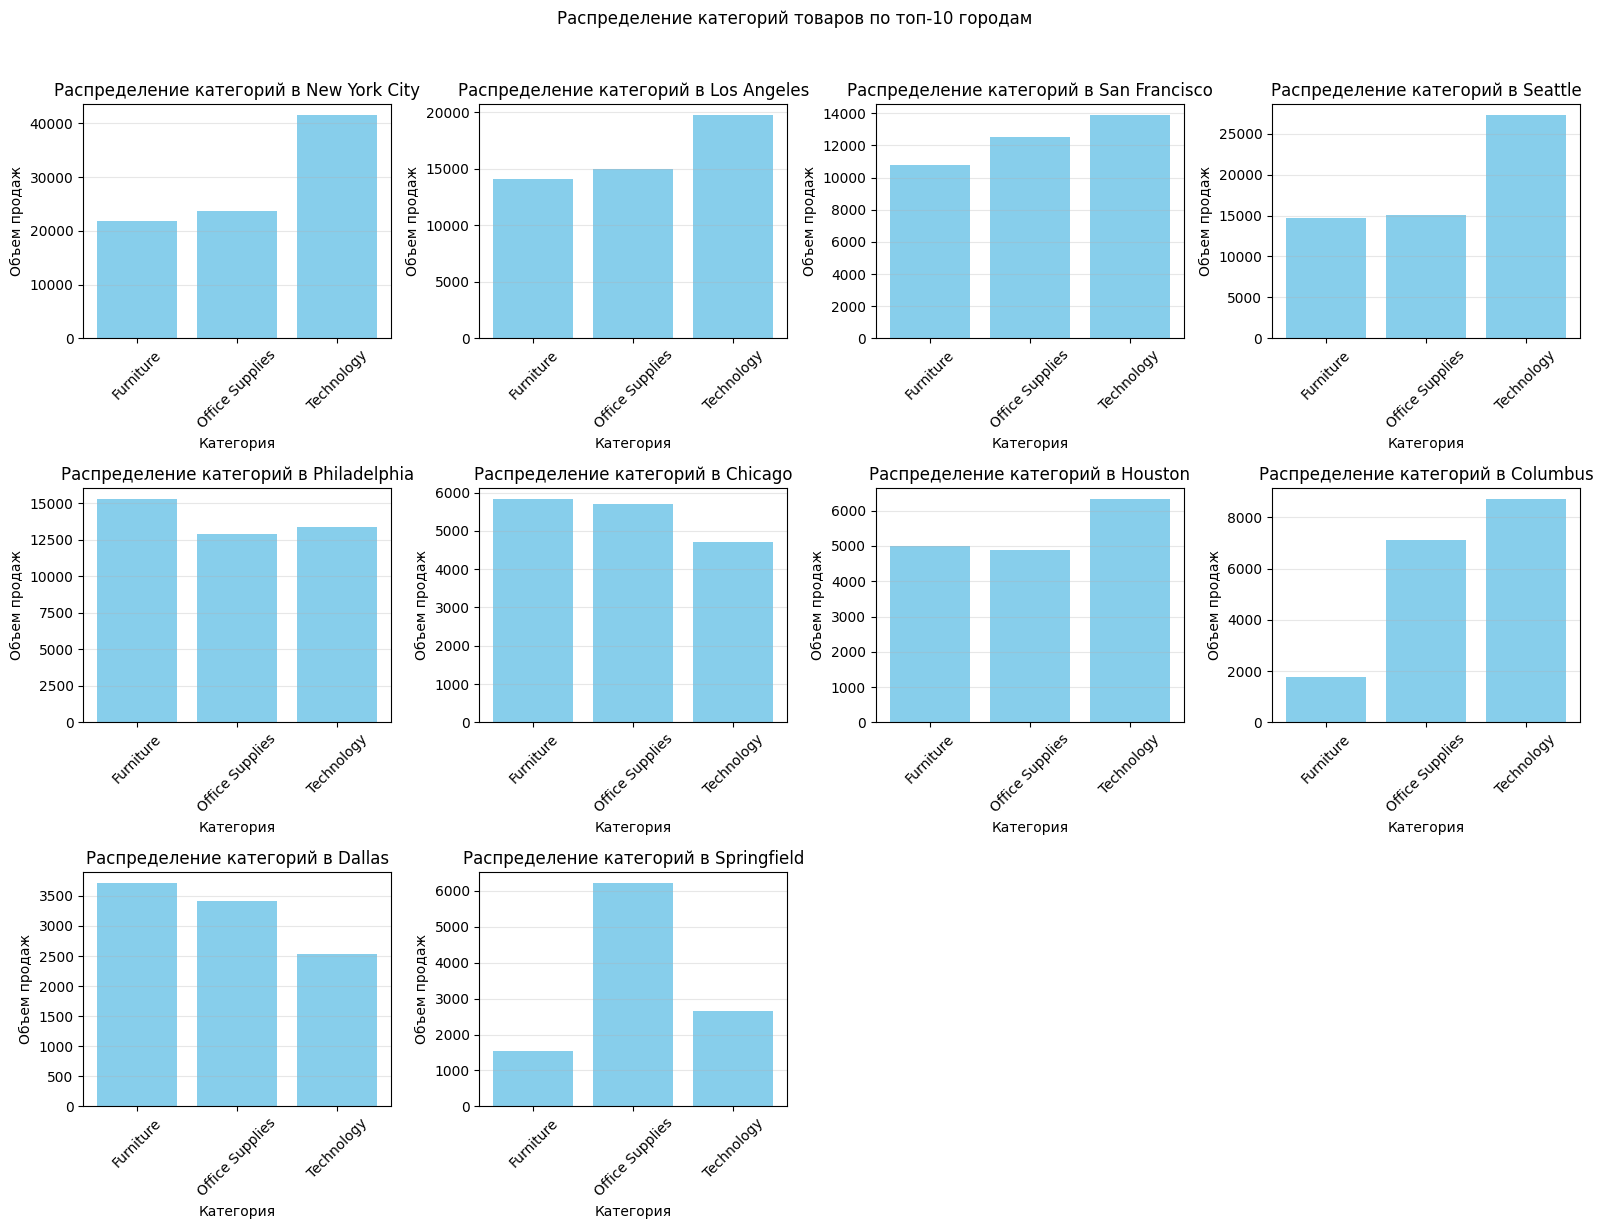

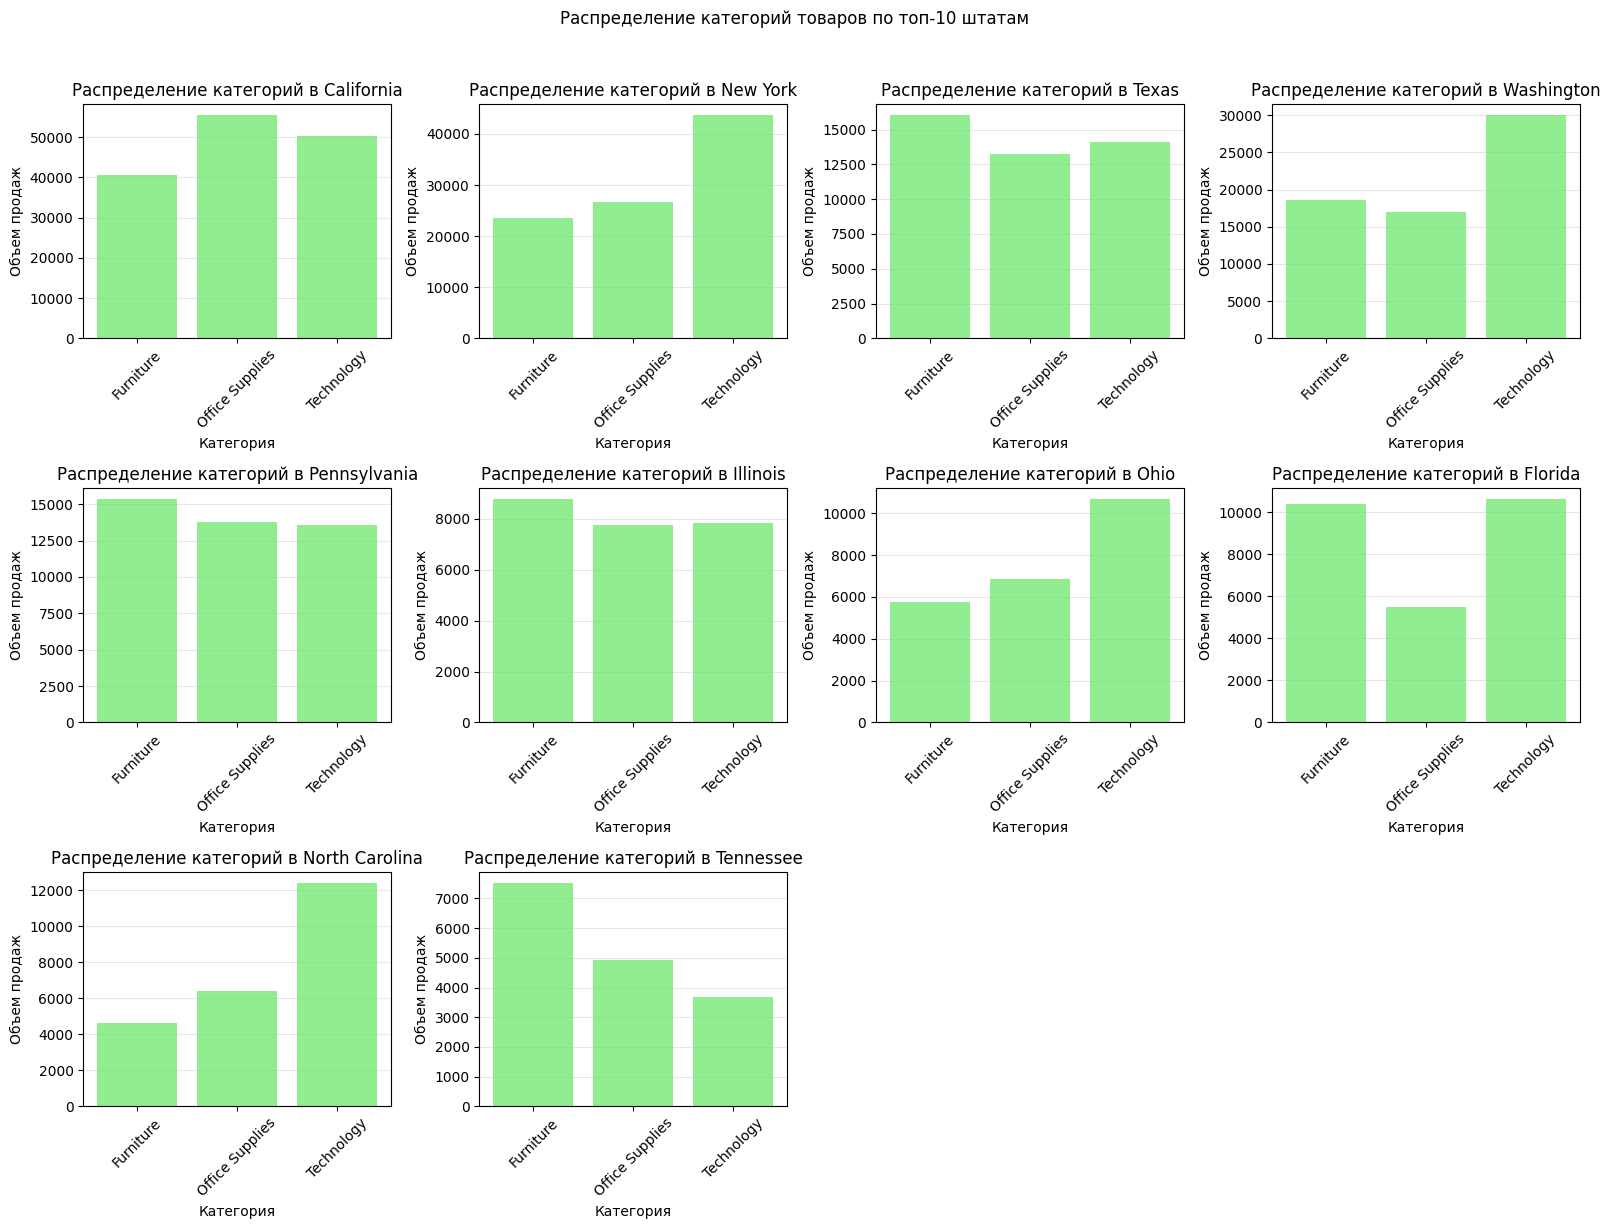

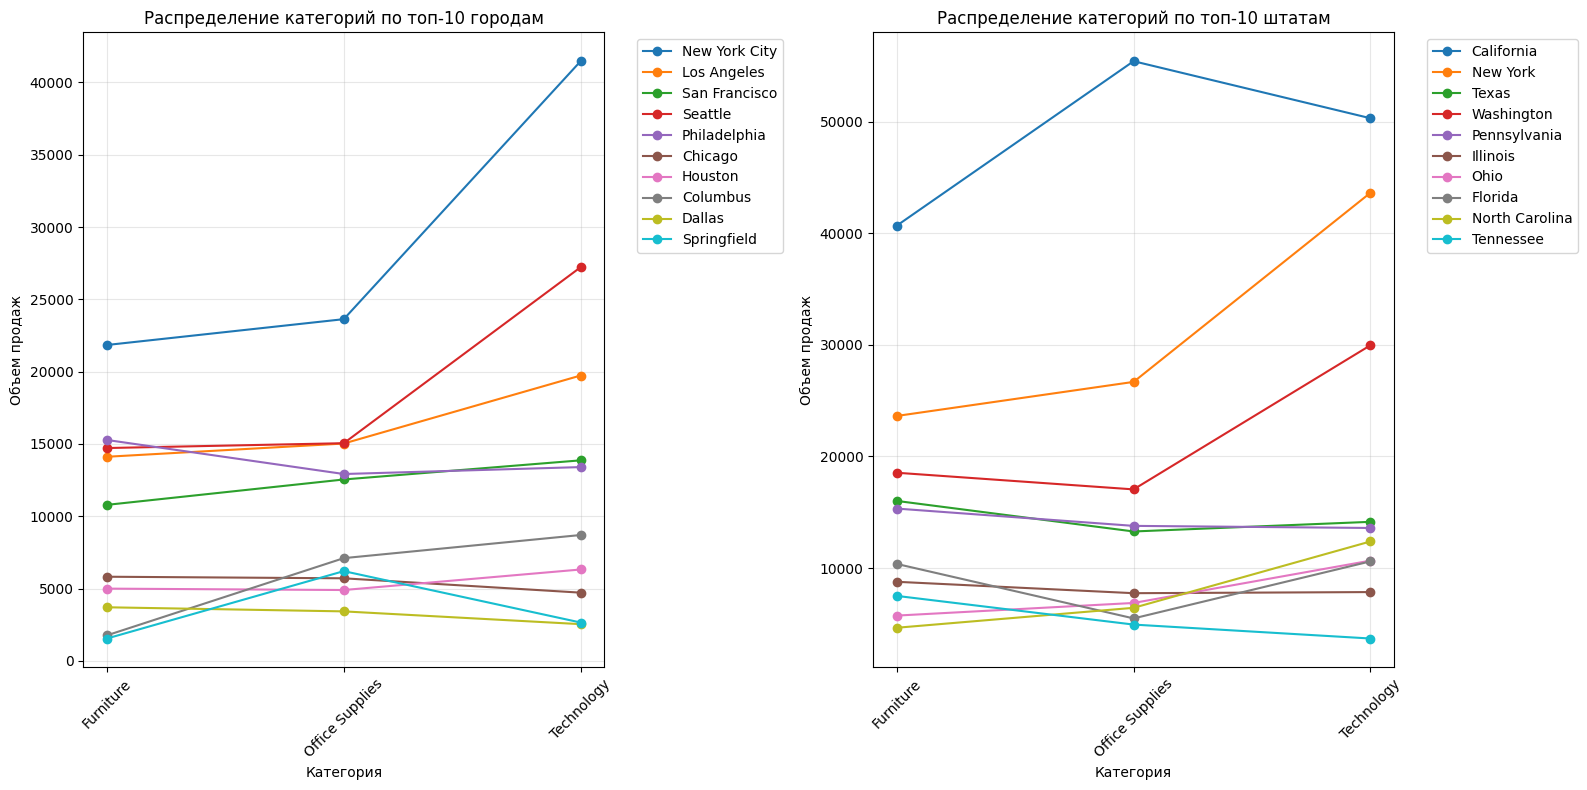

In [ ]:
# изучить распределение категорий внутри городов (штатам)

# 1. Группируем данные по городам и категориям, суммируем продажи
city_category_sales = df.groupby(['city', 'category'])['sales'].sum().reset_index(name='total_sales')

# 2. Группируем данные по штатам и категориям, суммируем продажи
state_category_sales = df.groupby(['state', 'category'])['sales'].sum().reset_index(name='total_sales')

# 3. Строим графики распределения категорий по топ-10 городам
plt.figure(figsize=(16, 12))

# Получаем топ-10 городов
top_cities = df['city'].value_counts().head(10).index

# Строим графики для каждого города
for i, city in enumerate(top_cities):
    city_data = city_category_sales[city_category_sales['city'] == city]

    plt.subplot(3, 4, i+1)
    plt.bar(city_data['category'], city_data['total_sales'], color='skyblue')
    plt.title(f'Распределение категорий в {city}')
    plt.xlabel('Категория')
    plt.ylabel('Объем продаж')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

plt.suptitle('Распределение категорий товаров по топ-10 городам', y=1.02)
plt.tight_layout()
plt.show()

# 4. Строим графики распределения категорий по топ-10 штатам
plt.figure(figsize=(16, 12))

# Получаем топ-10 штатов
top_states = df['state'].value_counts().head(10).index

# Строим графики для каждого штата
for i, state in enumerate(top_states):
    state_data = state_category_sales[state_category_sales['state'] == state]

    plt.subplot(3, 4, i+1)
    plt.bar(state_data['category'], state_data['total_sales'], color='lightgreen')
    plt.title(f'Распределение категорий в {state}')
    plt.xlabel('Категория')
    plt.ylabel('Объем продаж')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

plt.suptitle('Распределение категорий товаров по топ-10 штатам', y=1.02)
plt.tight_layout()
plt.show()

# 5. Строим график распределения категорий по топ-10 городам и штатам
plt.figure(figsize=(16, 8))

# Получаем топ-10 городов и штатов
top_cities = df['city'].value_counts().head(10).index
top_states = df['state'].value_counts().head(10).index

# Строим график для городов
plt.subplot(1, 2, 1)
for city in top_cities:
    city_data = city_category_sales[city_category_sales['city'] == city]
    plt.plot(city_data['category'], city_data['total_sales'], marker='o', label=city)

plt.title('Распределение категорий по топ-10 городам')
plt.xlabel('Категория')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Строим график для штатов
plt.subplot(1, 2, 2)
for state in top_states:
    state_data = state_category_sales[state_category_sales['state'] == state]
    plt.plot(state_data['category'], state_data['total_sales'], marker='o', label=state)

plt.title('Распределение категорий по топ-10 штатам')
plt.xlabel('Категория')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

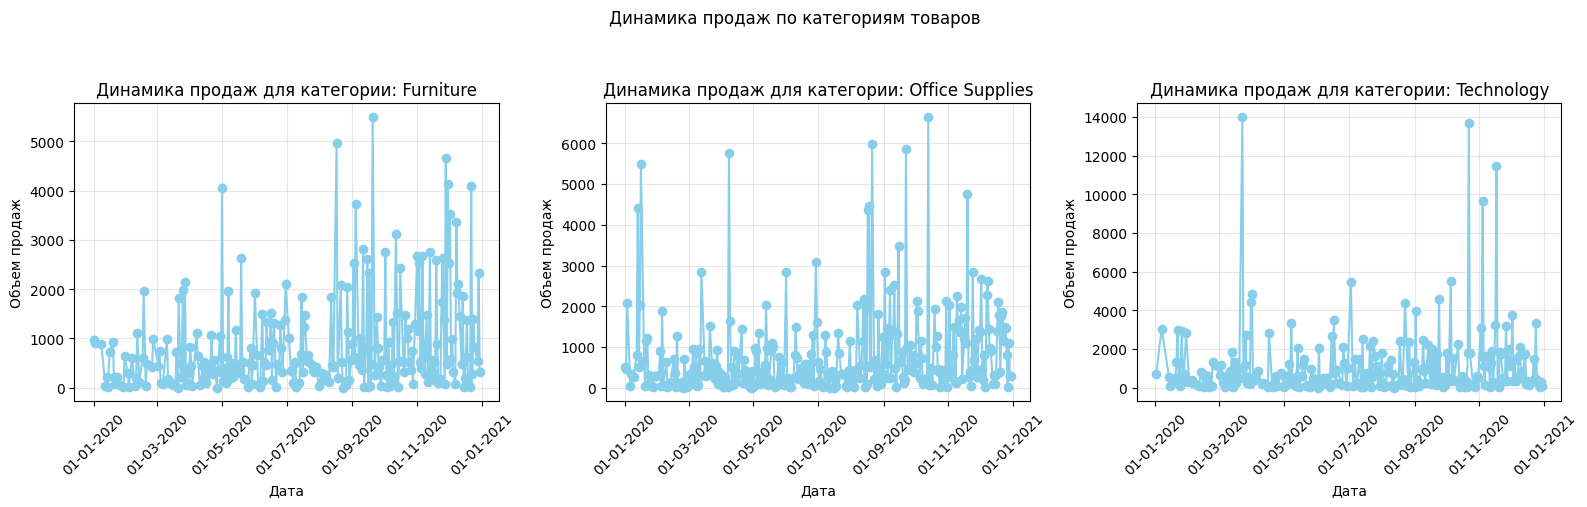

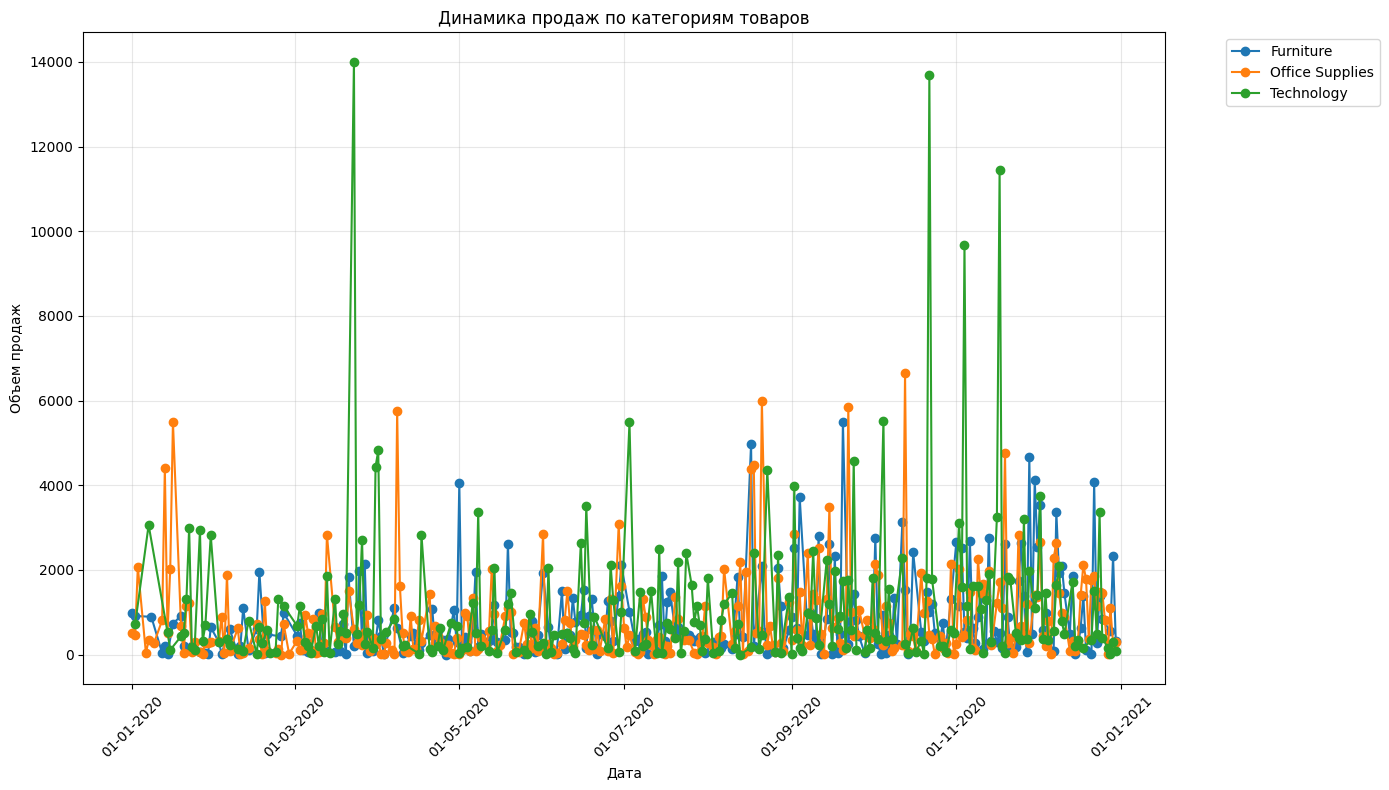

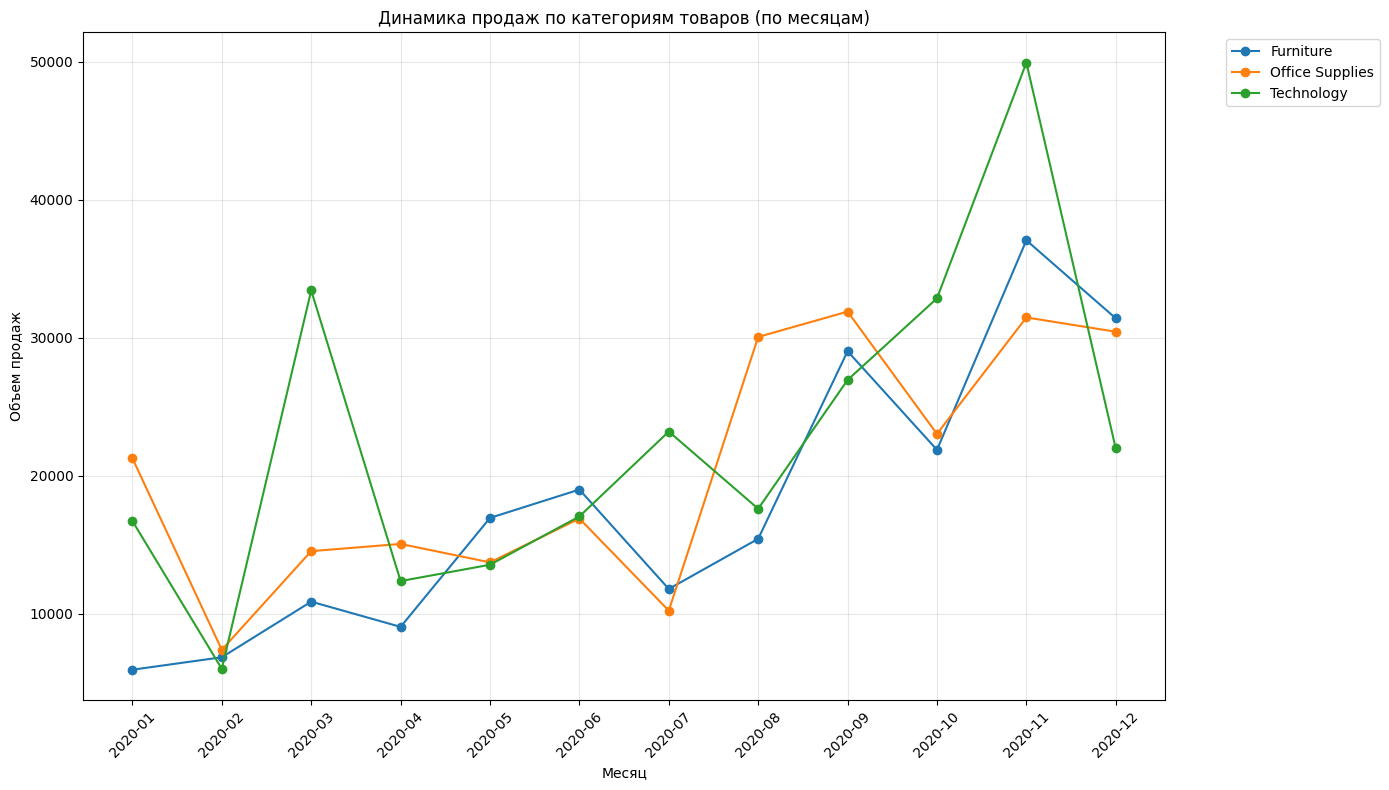

In [ ]:
# изучить динамику продаж внутри категорий

# 1. Преобразуем столбец orderDate в формат datetime
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%Y', errors='coerce')

# 2. Группируем данные по категориям и датам, суммируем продажи
category_date_sales = df.groupby(['category', 'orderDate'])['sales'].sum().reset_index(name='total_sales')

# 3. Получаем уникальные категории
categories = category_date_sales['category'].unique()

# 4. Строим графики динамики продаж по категориям
plt.figure(figsize=(16, 12))

# Строим графики для каждой категории
for i, category in enumerate(categories):
    category_data = category_date_sales[category_date_sales['category'] == category]
    plt.subplot(3, 3, i+1)
    plt.plot(category_data['orderDate'], category_data['total_sales'], marker='o', color='skyblue')
    plt.title(f'Динамика продаж для категории: {category}')
    plt.xlabel('Дата')
    plt.ylabel('Объем продаж')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    # Форматируем оси
    date_form = DateFormatter("%d-%m-%Y")
    plt.gca().xaxis.set_major_formatter(date_form)

plt.suptitle('Динамика продаж по категориям товаров', y=1.02)
plt.tight_layout()
plt.show()

# 5. Строим график динамики продаж по категориям на одном графике
plt.figure(figsize=(14, 8))

# Строим график
for category in categories:
    category_data = category_date_sales[category_date_sales['category'] == category]
    plt.plot(category_data['orderDate'], category_data['total_sales'], marker='o', label=category)

plt.title('Динамика продаж по категориям товаров')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Форматируем оси
date_form = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.show()

# 6. Строим график динамики продаж по категориям и месяцам
df['orderMonth'] = df['orderDate'].dt.to_period('M')
category_month_sales = df.groupby(['category', 'orderMonth'])['sales'].sum().reset_index(name='total_sales')
plt.figure(figsize=(14, 8))

# Строим график
for category in categories:
    category_data = category_month_sales[category_month_sales['category'] == category]
    plt.plot(category_data['orderMonth'].astype(str), category_data['total_sales'], marker='o', label=category)

plt.title('Динамика продаж по категориям товаров (по месяцам)')
plt.xlabel('Месяц')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

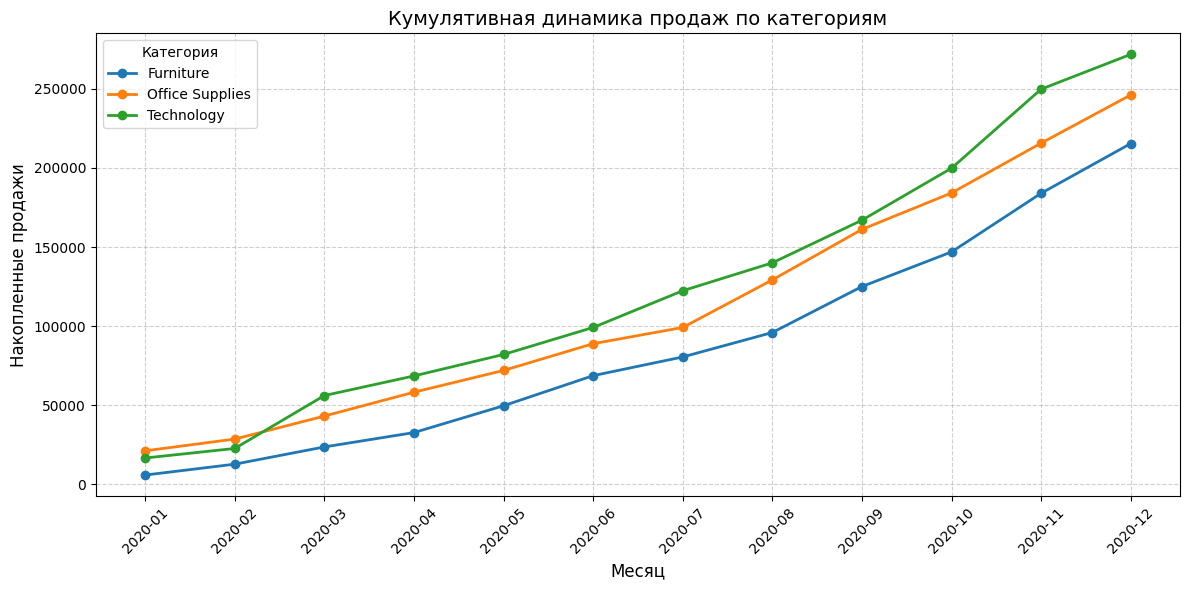

In [ ]:
# Преобразуем дату в формат datetime и создаем столбец с годом-месяцем
df['orderDate'] = pd.to_datetime(df['orderDate'])
df['year_month'] = df['orderDate'].dt.to_period('M').astype(str)

# Группируем по категориям и месяцам, считаем сумму продаж
sales_by_category = df.groupby(['category', 'year_month'])['sales'].sum().unstack(level=0)

# Сортируем месяцы в хронологическом порядке (если нужно)
sales_by_category = sales_by_category.sort_index()

# Вычисляем кумулятивную сумму для каждой категории
cumulative_sales = sales_by_category.cumsum()

# Построение графика
plt.figure(figsize=(12, 6))

for column in cumulative_sales.columns:
    plt.plot(cumulative_sales.index, cumulative_sales[column],
             marker='o', label=column, linewidth=2)

plt.title('Кумулятивная динамика продаж по категориям', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Накопленные продажи', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Категория', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1 всего в данных 693 клиента, которые сделали 1667 уникальных заказов

2 заказы по дням разбросаны хаотично, по месяцам идет постоянный спад со всплесеом в 11-й месяц, причина неизвестна

3 локация клиентов по городам ярко выражена:
	Нью Йорк
	Лос Анжелес
	Сан Франциско
	Сиэтл
	Филадельфия
	Чикаго
	Хьюстон
по штатам:
	Калифорния
	Нью Йорк
	Техас
	Вашингтон
	Пенсильвания
	Иллинойс
	Огайо
	Флорида

4 заказы по датам представляют сплошной забор, при анализе по месяцам - провалы в:
	февраль
	апрель
	июль
	октябрь
	декабрь
причины неизвестны, при этом наблюдается кумулятивный рост продаж как по датам, так и помесяцам

5 анализ по группам товаров показывает, что наиболее востребованы технологичные, затем оффисные и далее фурнитурные,
в подгруппах - телефоны, стулья, блендеры, хранилища, копиры...

6 по объему продаж города распределились:
	Нью Йорк
	Сиэтл
	Лос Анжелес
	Филадельфия
	Сан Франциско
а штаты
	Калифорния
	Нью Йорк
	Вашингтон
	Техас
	Пенсильвания
регионально
	Запад
	Восток
	Центр
	Север

7 по количеству продаж наиболее популярны разные степлеры, по суммам копиры "Кэнон" (остальное понять не могу)

8 в семи городах и чытырех штатах из десяти наиболее востребована категория технологичных товаров, все остальное хаотично

9 динамика продаж по датам представляют сплошной забор, при анализе по месяцам - провалы в:
	февраль
	апрель
	июль (технологичные август)
	октябрь
	декабрь
причины неизвестны, при этом наблюдается кумулятивный рост продаж как по датам, так и помесяцам